In [4]:
##Week 2 Assignment
#### Solar Permits Issues in LA Since 2021
#### Locations of solar permits, types of buildings (Permit-Sub Type)
#### If graphing, graph by zip code as well

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
#Importing and labeling my data set as 'Solar'
solar = gpd.read_file('data/Solar_Permits_Since_2021.csv')

In [7]:
#Checking the file type for my data set
type(solar)

geopandas.geodataframe.GeoDataFrame

In [8]:
#Checking the first 5 rows from the data set
solar.head(5)

,Site Number,Assessor Book,Assessor Page,Assessor Parcel,Tract,Block,Lot,Reference # (Old Permit #),PCIS Permit #,Status,...,Applicant Address 1,Applicant Address 2,Applicant Address 3,Zone,Occupancy,Floor Area-L.A. Building Code Definition,Census Tract,Council District,Latitude/Longitude,geometry
0,1,2701,107,13,TR 50505,,221,,22041-10000-66839,Issued,...,1414 Harbour Way South,,Richmond,[T]RE-1,,0,1082.02,12,"(34.29918, -118.58406)",None
1,2,2731,28,33,TR 26531,,63,,22041-10000-61262,Permit Finaled,...,21040 Nordhoff St,,Chatsworth,RE11-1,,0,1112.06,12,"(34.26076, -118.53043)",None
2,3,5064,14,23,TR 5770,,164,,22041-10000-12013,Permit Finaled,...,2447 Pacific Coast Highway Sui,,Hermosa Beach,RD2-1,,0,2183,10,"(34.04212, -118.36145)",None
3,4,4019,1,13,TR 5525,,144,,22041-10000-67698,Issued,...,2358 Cepheus Ct,,Bakersfield,R1-1,,0,2351,8,"(33.98812, -118.34574)",None
4,5,6083,5,8,TR 3598,,34,,22041-10000-68278,Issued,...,1358 La Mirada Dr,,San Marcos,R2-1,,0,2410.01,15,"(33.93088, -118.26819)",None


In [9]:
#Checking the data types for each column in the set
solar.dtypes

Site Number                                   object
Assessor Book                                 object
Assessor Page                                 object
Assessor Parcel                               object
Tract                                         object
Block                                         object
Lot                                           object
Reference # (Old Permit #)                    object
PCIS Permit #                                 object
Status                                        object
Status Date                                   object
Permit Type                                   object
Permit Sub-Type                               object
Permit Category                               object
Project Number                                object
Event Code                                    object
Initiating Office                             object
Issue Date                                    object
Address Start                                 

In [10]:
#Checking for any gaps or missing pieces of data across the columns in the data set
solar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Site Number                               281 non-null    object  
 1   Assessor Book                             281 non-null    object  
 2   Assessor Page                             281 non-null    object  
 3   Assessor Parcel                           281 non-null    object  
 4   Tract                                     281 non-null    object  
 5   Block                                     281 non-null    object  
 6   Lot                                       281 non-null    object  
 7   Reference # (Old Permit #)                281 non-null    object  
 8   PCIS Permit #                             281 non-null    object  
 9   Status                                    281 non-null    object  
 10  Status Date       

In [11]:
#Determining the shape of the data, or the number of rows and columns
solar.shape

(281, 57)

In [12]:
#Listing the columns in the data set
solar.columns.to_list()

['Site Number',
 'Assessor Book',
 'Assessor Page',
 'Assessor Parcel',
 'Tract',
 'Block',
 'Lot',
 'Reference # (Old Permit #)',
 'PCIS Permit #',
 'Status',
 'Status Date',
 'Permit Type',
 'Permit Sub-Type',
 'Permit Category',
 'Project Number',
 'Event Code',
 'Initiating Office',
 'Issue Date',
 'Address Start',
 'Address Fraction Start',
 'Address End',
 'Address Fraction End',
 'Street Direction',
 'Street Name',
 'Street Suffix',
 'Suffix Direction',
 'Unit Range Start',
 'Unit Range End',
 'Zip Code',
 'Work Description',
 'Valuation',
 'Floor Area-L.A. Zoning Code Definition',
 '# of Residential Dwelling Units',
 '# of Stories',
 "Contractor's Business Name",
 'Contractor Address',
 'Contractor City',
 'Contractor State',
 'License Type',
 'License #',
 'Principal First Name',
 'Principal Middle Name',
 'Principal Last Name',
 'License Expiration Date',
 'Applicant First Name',
 'Applicant Last Name',
 'Applicant Business Name',
 'Applicant Address 1',
 'Applicant Address 2

In [13]:
#Taking a random sample of 10 rows of data for the 'Permit Type' column. The output is a random sample of the types of permits in the set.
solar['Permit Type'].sample(10)

176    Electrical
237    Electrical
272    Electrical
3      Electrical
71     Electrical
19     Electrical
67     Electrical
16     Electrical
279    Electrical
117    Electrical
Name: Permit Type, dtype: object

In [16]:
#Showing the different values for the different Permit Types in the data set the number of instances for each type
solar['Permit Type'].value_counts()

Electrical           264
Bldg-New              14
Bldg-Alter/Repair      3
Name: Permit Type, dtype: int64

In [17]:
#Showing the values for the different Permit Sub-Types and the number of instances for each type
solar['Permit Sub-Type'].value_counts()

1 or 2 Family Dwelling    271
Apartment                   6
Commercial                  4
Name: Permit Sub-Type, dtype: int64

In [18]:
#Showing the values for the different Zip Codes within the data set and the number of solar permits issued in each
solar['Zip Code'].value_counts()

90732    19
91326    15
91311    13
91367    10
91335     9
         ..
90023     1
91345     1
90012     1
90061     1
91401     1
Name: Zip Code, Length: 83, dtype: int64

In [29]:
#Saving 'Permit Sub-Type' as a variable
subtype_count = solar['Permit Sub-Type'].value_counts()
subtype_count

1 or 2 Family Dwelling    271
Apartment                   6
Commercial                  4
Name: Permit Sub-Type, dtype: int64

In [30]:
#Checking the data type for permit_subtype
type(subtype_count)

pandas.core.series.Series

In [31]:
#Converting the series into a dataframe
subtype_count = subtype_count.reset_index()
subtype_count

,index,Permit Sub-Type
0,1 or 2 Family Dwelling,271
1,Apartment,6
2,Commercial,4


In [32]:
type(subtype_count)

pandas.core.frame.DataFrame

In [33]:
subtype_count.columns.to_list()

['index', 'Permit Sub-Type']

In [34]:
#Renaming the columns
subtype_count.columns = ['Permit Sub-Type', 'Count']

In [35]:
subtype_count

,Permit Sub-Type,Count
0,1 or 2 Family Dwelling,271
1,Apartment,6
2,Commercial,4


<AxesSubplot: title={'center': 'Number of Permits issued per Electrical Permit Sub-Types'}, xlabel='Permit Sub-Type'>

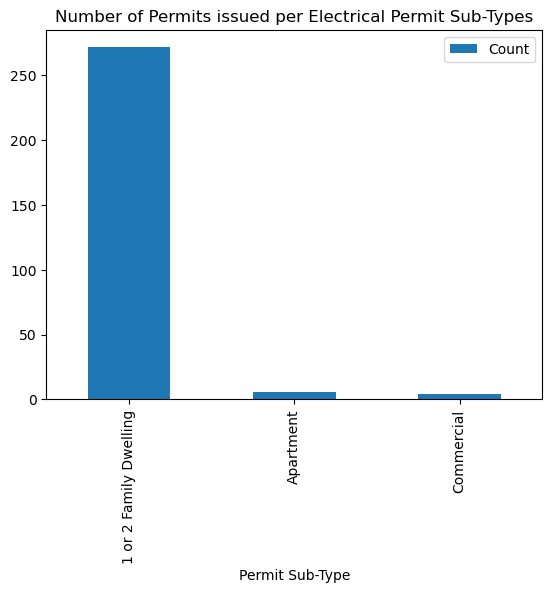

In [39]:
#Creating a simple bar graph
subtype_count.plot.bar(x = 'Permit Sub-Type', y = 'Count', title = 'Number of Permits issued per Electrical Permit Sub-Types')

In [40]:
#Trimming the data columns in the data set
solar.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 57 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Site Number                               281 non-null    object  
 1   Assessor Book                             281 non-null    object  
 2   Assessor Page                             281 non-null    object  
 3   Assessor Parcel                           281 non-null    object  
 4   Tract                                     281 non-null    object  
 5   Block                                     281 non-null    object  
 6   Lot                                       281 non-null    object  
 7   Reference # (Old Permit #)                281 non-null    object  
 8   PCIS Permit #                             281 non-null    object  
 9   Status                                    281 non-null    object  
 10  Status Date       

In [48]:
#Showing a dataframe with a subset of columns
solar[['Site Number','Permit Type','Permit Sub-Type','Issue Date','Zip Code','Latitude/Longitude']]

,Site Number,Permit Type,Permit Sub-Type,Issue Date,Zip Code,Latitude/Longitude
0,1,Electrical,1 or 2 Family Dwelling,1/10/23,91326,"(34.29918, -118.58406)"
1,2,Electrical,1 or 2 Family Dwelling,12/5/22,91326,"(34.26076, -118.53043)"
2,3,Electrical,1 or 2 Family Dwelling,7/6/22,90019,"(34.04212, -118.36145)"
3,4,Electrical,1 or 2 Family Dwelling,1/9/23,90043,"(33.98812, -118.34574)"
4,5,Electrical,1 or 2 Family Dwelling,1/5/23,90061,"(33.93088, -118.26819)"
...,...,...,...,...,...,...
276,277,Electrical,1 or 2 Family Dwelling,1/12/23,91331,"(34.25654, -118.41868)"
277,278,Electrical,1 or 2 Family Dwelling,1/9/23,91607,"(34.1764, -118.39446)"
278,279,Electrical,1 or 2 Family Dwelling,12/23/22,90038,"(34.08574, -118.34179)"
279,280,Electrical,1 or 2 Family Dwelling,1/11/23,90077,"(34.11291, -118.47489)"


In [49]:
#Creating a list of desired columns names
desired_columns = ['Site Number','Permit Type','Permit Sub-Type','Issue Date','Zip Code','Latitude/Longitude']

In [50]:
#Showing a random sample of 5 rows of the trimmed dataframe
solar[desired_columns].sample(5)

,Site Number,Permit Type,Permit Sub-Type,Issue Date,Zip Code,Latitude/Longitude
206,207,Electrical,Apartment,4/4/22,90732,
5,6,Electrical,1 or 2 Family Dwelling,1/5/23,90272,"(34.05074, -118.52711)"
69,70,Electrical,1 or 2 Family Dwelling,1/3/23,90049,"(34.07729, -118.47849)"
53,54,Electrical,1 or 2 Family Dwelling,6/18/22,90002,"(33.94823, -118.24817)"
257,258,Electrical,Apartment,5/10/22,90732,


In [51]:
#Preserving the new dataframe by declaring it as a new variable 'solar_trimmed'
solar_trimmed = solar[desired_columns].copy()

In [52]:
solar_trimmed

,Site Number,Permit Type,Permit Sub-Type,Issue Date,Zip Code,Latitude/Longitude
0,1,Electrical,1 or 2 Family Dwelling,1/10/23,91326,"(34.29918, -118.58406)"
1,2,Electrical,1 or 2 Family Dwelling,12/5/22,91326,"(34.26076, -118.53043)"
2,3,Electrical,1 or 2 Family Dwelling,7/6/22,90019,"(34.04212, -118.36145)"
3,4,Electrical,1 or 2 Family Dwelling,1/9/23,90043,"(33.98812, -118.34574)"
4,5,Electrical,1 or 2 Family Dwelling,1/5/23,90061,"(33.93088, -118.26819)"
...,...,...,...,...,...,...
276,277,Electrical,1 or 2 Family Dwelling,1/12/23,91331,"(34.25654, -118.41868)"
277,278,Electrical,1 or 2 Family Dwelling,1/9/23,91607,"(34.1764, -118.39446)"
278,279,Electrical,1 or 2 Family Dwelling,12/23/22,90038,"(34.08574, -118.34179)"
279,280,Electrical,1 or 2 Family Dwelling,1/11/23,90077,"(34.11291, -118.47489)"
